In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

data = pd.read_csv("국민건강보험공단_건강검진정보_20211231.csv")
data

,HCHK_YEAR,IDV_ID,SIDO,SEX,AGE_GROUP,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,...,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,HCHK_OE_INSPEC_YN,CRS_YN,TTH_MSS_YN,ODT_TRB_YN,WSDM_DIS_YN,TTR_YN,DATA_STD_DT
0,2021,2551207,41,2,12,160,60,79.0,0.0,0.0,...,23.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,2022-08-11
1,2021,4030716,41,2,11,160,60,74.0,0.0,0.0,...,12.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,2022-08-11
2,2021,3297511,41,2,9,150,60,72.0,0.0,0.0,...,70.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,2022-08-11
3,2021,1638533,41,2,16,150,60,86.0,0.0,0.0,...,24.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,2022-08-11
4,2021,456602,41,2,13,155,60,66.0,0.0,0.0,...,12.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,2022-08-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2021,4447892,11,2,14,150,60,91.0,0.0,0.0,...,32.0,1.0,0.0,1,0.0,NaN,NaN,NaN,0.0,2022-08-11
999996,2021,2763417,47,1,9,170,100,99.0,1.0,1.0,...,73.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,2022-08-11
999997,2021,572436,47,2,10,150,75,98.0,0.0,0.0,...,70.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,2022-08-11
999998,2021,541281,11,2,10,160,55,70.0,0.0,0.0,...,140.0,1.0,0.0,1,0.0,NaN,NaN,NaN,0.0,2022-08-11


In [90]:
k = ['BP_HIGH','BP_LWST','BLDS', 'WAIST', 'TRIGLYCERIDE','TOT_CHOLE','HDL_CHOLE','LDL_CHOLE', 'HMG', 'GAMMA_GTP', 'SMK_STAT_TYPE_CD']
df = data[k]

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BP_HIGH           992655 non-null  float64
 1   BP_LWST           992655 non-null  float64
 2   BLDS              992588 non-null  float64
 3   WAIST             999917 non-null  float64
 4   TRIGLYCERIDE      425055 non-null  float64
 5   TOT_CHOLE         425059 non-null  float64
 6   HDL_CHOLE         425055 non-null  float64
 7   LDL_CHOLE         417432 non-null  float64
 8   HMG               992586 non-null  float64
 9   GAMMA_GTP         992594 non-null  float64
 10  SMK_STAT_TYPE_CD  999630 non-null  float64
dtypes: float64(11)
memory usage: 83.9 MB


In [92]:
df.describe()

,BP_HIGH,BP_LWST,BLDS,WAIST,TRIGLYCERIDE,TOT_CHOLE,HDL_CHOLE,LDL_CHOLE,HMG,GAMMA_GTP,SMK_STAT_TYPE_CD
count,992655.000000,992655.000000,992588.000000,999917.000000,425055.000000,425059.000000,425055.000000,417432.000000,992586.000000,992594.000000,999630.000000
mean,124.799935,76.672873,104.005074,82.083689,131.302629,198.747915,57.039856,116.261449,13.714809,37.429200,1.548162
std,14.821133,10.099609,24.979984,9.743215,99.344578,43.769043,16.686704,39.384127,1.581361,71.566104,0.782812
min,65.000000,30.000000,1.000000,32.000000,1.000000,44.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,115.000000,70.000000,91.000000,75.000000,75.000000,170.000000,46.000000,89.000000,13.000000,16.000000,1.000000
50%,124.000000,77.000000,99.000000,82.000000,107.000000,198.000000,55.000000,115.000000,14.000000,24.000000,1.000000
75%,134.000000,83.000000,109.000000,88.000000,157.000000,226.000000,66.000000,141.000000,15.000000,39.000000,2.000000
max,253.000000,202.000000,838.000000,450.000000,5858.000000,2625.000000,909.000000,2584.000000,24.000000,9999.000000,3.000000


In [93]:
missing_values = df.isnull().sum()

print("각 컬럼별 결측치 개수:")
print(missing_values)

각 컬럼별 결측치 개수:
BP_HIGH               7345
BP_LWST               7345
BLDS                  7412
WAIST                   83
TRIGLYCERIDE        574945
TOT_CHOLE           574941
HDL_CHOLE           574945
LDL_CHOLE           582568
HMG                   7414
GAMMA_GTP             7406
SMK_STAT_TYPE_CD       370
dtype: int64


In [94]:
df['SMK_STAT_TYPE_CD'] = df['SMK_STAT_TYPE_CD'].replace(3.0, 2.0)

print(df.head())
print(df[df['SMK_STAT_TYPE_CD'] == 3.0])


   BP_HIGH  BP_LWST   BLDS  WAIST  TRIGLYCERIDE  TOT_CHOLE  HDL_CHOLE  \
0    101.0     60.0   93.0   79.0           NaN        NaN        NaN   
1    121.0     75.0  108.0   74.0           NaN        NaN        NaN   
2    135.0     82.0  104.0   72.0           NaN        NaN        NaN   
3    130.0     77.0  146.0   86.0           NaN        NaN        NaN   
4    120.0     80.0   90.0   66.0           NaN        NaN        NaN   

   LDL_CHOLE   HMG  GAMMA_GTP  SMK_STAT_TYPE_CD  
0        NaN  13.0       23.0               1.0  
1        NaN  13.0       12.0               1.0  
2        NaN  13.0       70.0               1.0  
3        NaN  13.0       24.0               1.0  
4        NaN  13.0       12.0               1.0  
Empty DataFrame
Columns: [BP_HIGH, BP_LWST, BLDS, WAIST, TRIGLYCERIDE, TOT_CHOLE, HDL_CHOLE, LDL_CHOLE, HMG, GAMMA_GTP, SMK_STAT_TYPE_CD]
Index: []


/var/folders/xf/_3yhyf7n1qb_40z_8y15fqsw0000gn/T/ipykernel_7711/185911654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SMK_STAT_TYPE_CD'] = df['SMK_STAT_TYPE_CD'].replace(3.0, 2.0)


In [95]:
dt = df
df = df.dropna()
missing_values = df.isnull().sum()
print("각 컬럼별 결측치 개수:")
print(missing_values)


각 컬럼별 결측치 개수:
BP_HIGH             0
BP_LWST             0
BLDS                0
WAIST               0
TRIGLYCERIDE        0
TOT_CHOLE           0
HDL_CHOLE           0
LDL_CHOLE           0
HMG                 0
GAMMA_GTP           0
SMK_STAT_TYPE_CD    0
dtype: int64


In [96]:
def remove_outliers_zscore(df, column, z_threshold=3):
    # Z-score 계산
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    
    df_filtered = df[abs(z_scores) <= z_threshold]
    
    return df_filtered

df = remove_outliers_zscore(df, 'BP_HIGH')
df = remove_outliers_zscore(df, 'BP_LWST')

In [97]:
def remove_outliers(df, column, quantile_low=0.05, quantile_high=0.95):
    low_limit = df[column].quantile(quantile_low)
    high_limit = df[column].quantile(quantile_high)
    df_filtered = df[(df[column] >= low_limit) & (df[column] <= high_limit)]
    return df_filtered
df = remove_outliers(df, 'BLDS')
df = remove_outliers(df,  'WAIST')
df = remove_outliers(df, 'TRIGLYCERIDE')
df = remove_outliers(df, 'GAMMA_GTP')

In [98]:
df = df[(df['TOT_CHOLE'] <= 1000) & (df['LDL_CHOLE'] <= 1000)]

In [99]:
df = df[(df['TOT_CHOLE'] <= 600) & (df['LDL_CHOLE'] <= 600) & (df['HDL_CHOLE'] <= 600)]

In [100]:
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
# 라벨 인코더 생성
label_encoder = LabelEncoder()

# 'SMK_STAT_TYPE_CD' 열에 라벨 인코딩 적용
df['SMK_STAT_TYPE_CD'] = label_encoder.fit_transform(df['SMK_STAT_TYPE_CD'])

# 모델 생성
X = sm.add_constant(df[['BP_HIGH','BP_LWST','BLDS', 'WAIST', 'TRIGLYCERIDE','TOT_CHOLE','HDL_CHOLE','LDL_CHOLE', 'HMG', 'GAMMA_GTP']])
y = df['SMK_STAT_TYPE_CD']
model = sm.Logit(y, X).fit()

# 로지스틱 회귀분석 결과 출력
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.521610
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       SMK_STAT_TYPE_CD   No. Observations:               277822
Model:                          Logit   Df Residuals:                   277811
Method:                           MLE   Df Model:                           10
Date:                Thu, 14 Dec 2023   Pseudo R-squ.:                  0.1860
Time:                        19:15:22   Log-Likelihood:            -1.4491e+05
converged:                       True   LL-Null:                   -1.7802e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -9.1921      0.087   -106.224      0.000      -9.362      -9.022
BP_HIGH         -0.0131

In [101]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

# 결측치 처리 (예시로 각 열의 중앙값으로 대체)

dt = dt.dropna(subset = ['SMK_STAT_TYPE_CD'])
filled_df = dt.fillna(dt.median())

# RobustScaler 적용
scaler = RobustScaler()
filled_df = pd.DataFrame(scaler.fit_transform(filled_df), columns=filled_df.columns)

filled_df = remove_outliers_zscore(filled_df, 'BP_HIGH')
filled_df = remove_outliers_zscore(filled_df, 'BP_LWST')
filled_df = remove_outliers_zscore(filled_df, 'BLDS')
filled_df = remove_outliers_zscore(filled_df,  'WAIST')
filled_df = remove_outliers_zscore(filled_df, 'TRIGLYCERIDE')
filled_df = remove_outliers_zscore(filled_df, 'GAMMA_GTP')
filled_df = filled_df[(filled_df['TOT_CHOLE'] <= 1000) & (filled_df['LDL_CHOLE'] <= 1000)]
filled_df = filled_df[(filled_df['TOT_CHOLE'] <= 600) & (filled_df['LDL_CHOLE'] <= 600) & (filled_df['HDL_CHOLE'] <= 600)]

               BP_HIGH   BP_LWST      BLDS     WAIST  TRIGLYCERIDE  TOT_CHOLE  \
BP_HIGH       1.000000  0.677741  0.180471  0.277800      0.097182  -0.019467   
BP_LWST       0.677741  1.000000  0.108484  0.239408      0.107726   0.048363   
BLDS          0.180471  0.108484  1.000000  0.248665      0.113823  -0.076275   
WAIST         0.277800  0.239408  0.248665  1.000000      0.206744  -0.050737   
TRIGLYCERIDE  0.097182  0.107726  0.113823  0.206744      1.000000   0.179372   
TOT_CHOLE    -0.019467  0.048363 -0.076275 -0.050737      0.179372   1.000000   
HDL_CHOLE    -0.059339 -0.039561 -0.087066 -0.227093     -0.352559   0.261334   
LDL_CHOLE    -0.027486  0.034488 -0.083484 -0.024900      0.061849   0.935075   
HMG           0.113916  0.244448  0.117975  0.339676      0.151903   0.071768   
GAMMA_GTP     0.132910  0.177878  0.174663  0.288199      0.179054   0.029362   

              HDL_CHOLE  LDL_CHOLE       HMG  GAMMA_GTP  
BP_HIGH       -0.059339  -0.027486  0.113916   0.1

<Axes: >

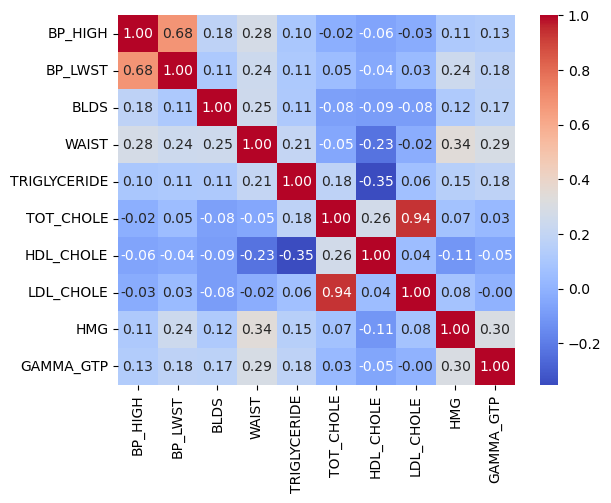

In [103]:
correlation = filled_df[['BP_HIGH','BP_LWST','BLDS', 'WAIST', 'TRIGLYCERIDE','TOT_CHOLE','HDL_CHOLE','LDL_CHOLE', 'HMG', 'GAMMA_GTP']].corr()

# 결과 출력
print(correlation)
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')

In [102]:
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
# 라벨 인코더 생성
label_encoder = LabelEncoder()

# 'SMK_STAT_TYPE_CD' 열에 라벨 인코딩 적용
filled_df['SMK_STAT_TYPE_CD'] = label_encoder.fit_transform(filled_df['SMK_STAT_TYPE_CD'])

# 모델 생성
X = sm.add_constant(filled_df[['BP_HIGH','BP_LWST','BLDS', 'WAIST', 'TRIGLYCERIDE','TOT_CHOLE','HDL_CHOLE','LDL_CHOLE', 'HMG', 'GAMMA_GTP']])
y = filled_df['SMK_STAT_TYPE_CD']
model = sm.Logit(y, X).fit()

# 로지스틱 회귀분석 결과 출력
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.522417
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       SMK_STAT_TYPE_CD   No. Observations:               942965
Model:                          Logit   Df Residuals:                   942954
Method:                           MLE   Df Model:                           10
Date:                Thu, 14 Dec 2023   Pseudo R-squ.:                  0.1966
Time:                        19:15:26   Log-Likelihood:            -4.9262e+05
converged:                       True   LL-Null:                   -6.1319e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.6456      0.003   -201.217      0.000      -0.652      -0.639
BP_HIGH         -0.2135